1. Install & Import Dependencies

In [1]:
!pip install ultralytics --quiet
from ultralytics import YOLO
!pip3 install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.5/513.5 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 9.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import os

In [3]:
HOME = os.getcwd()
HOME

'/content'

 2. Load & Run Model 

100%|██████████| 6.23M/6.23M [00:08<00:00, 808kB/s] 

100%|██████████| 476k/476k [00:00<00:00, 78.7MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 57.8ms
Speed: 0.6ms preprocess, 57.8ms inference, 28.6ms postprocess per image at shape (1, 3, 640, 640)


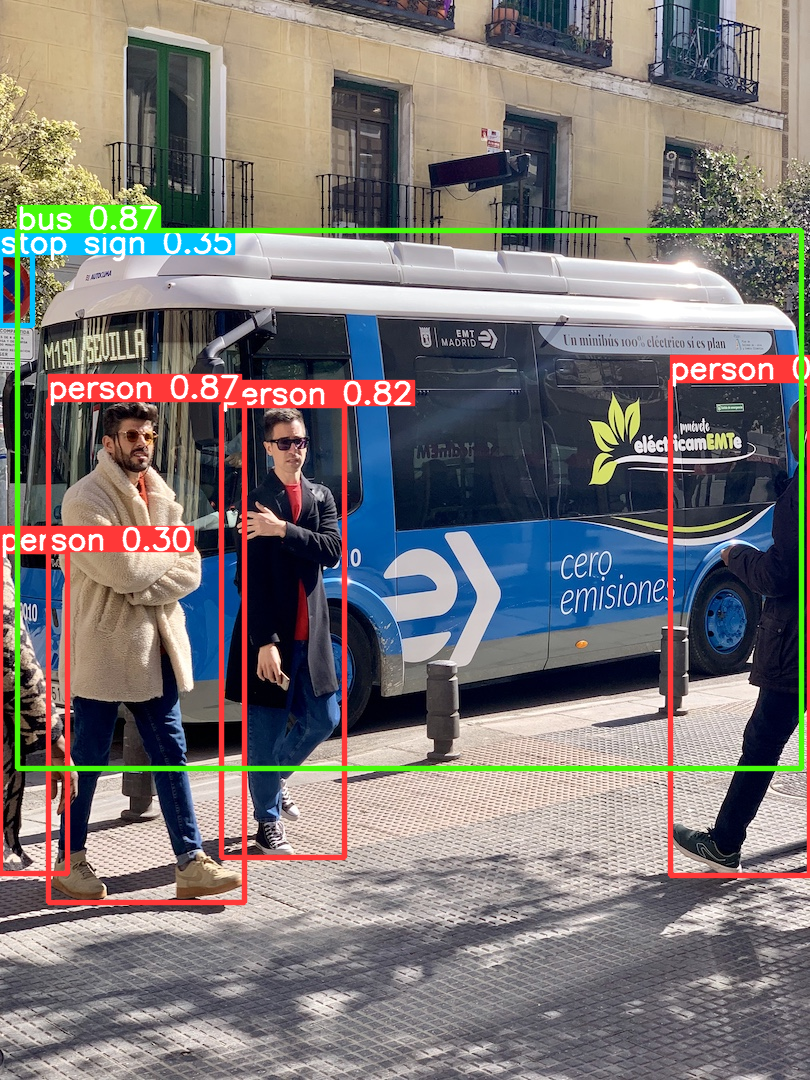

In [4]:
import cv2
model = YOLO('yolov8n.pt')
res = model('https://ultralytics.com/images/bus.jpg')
res_plotted = res[0].plot()
cv2_imshow(res_plotted)

 5. Training on custom dataset

In [5]:
!mkdir datasets 
%cd datasets 

/content/datasets


In [6]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="your api key here")
project = rf.workspace("scidrones").project("emerge-test-1")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.78, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Emerge-Test-1-1 in yolov8:: 100%|██████████| 13730/13730 [00:04<00:00, 3101.76it/s]


In [7]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 209MB/s]
Ultralytics YOLOv8.0.78 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Emerge-Test-1-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torc

6. Visualizing the results

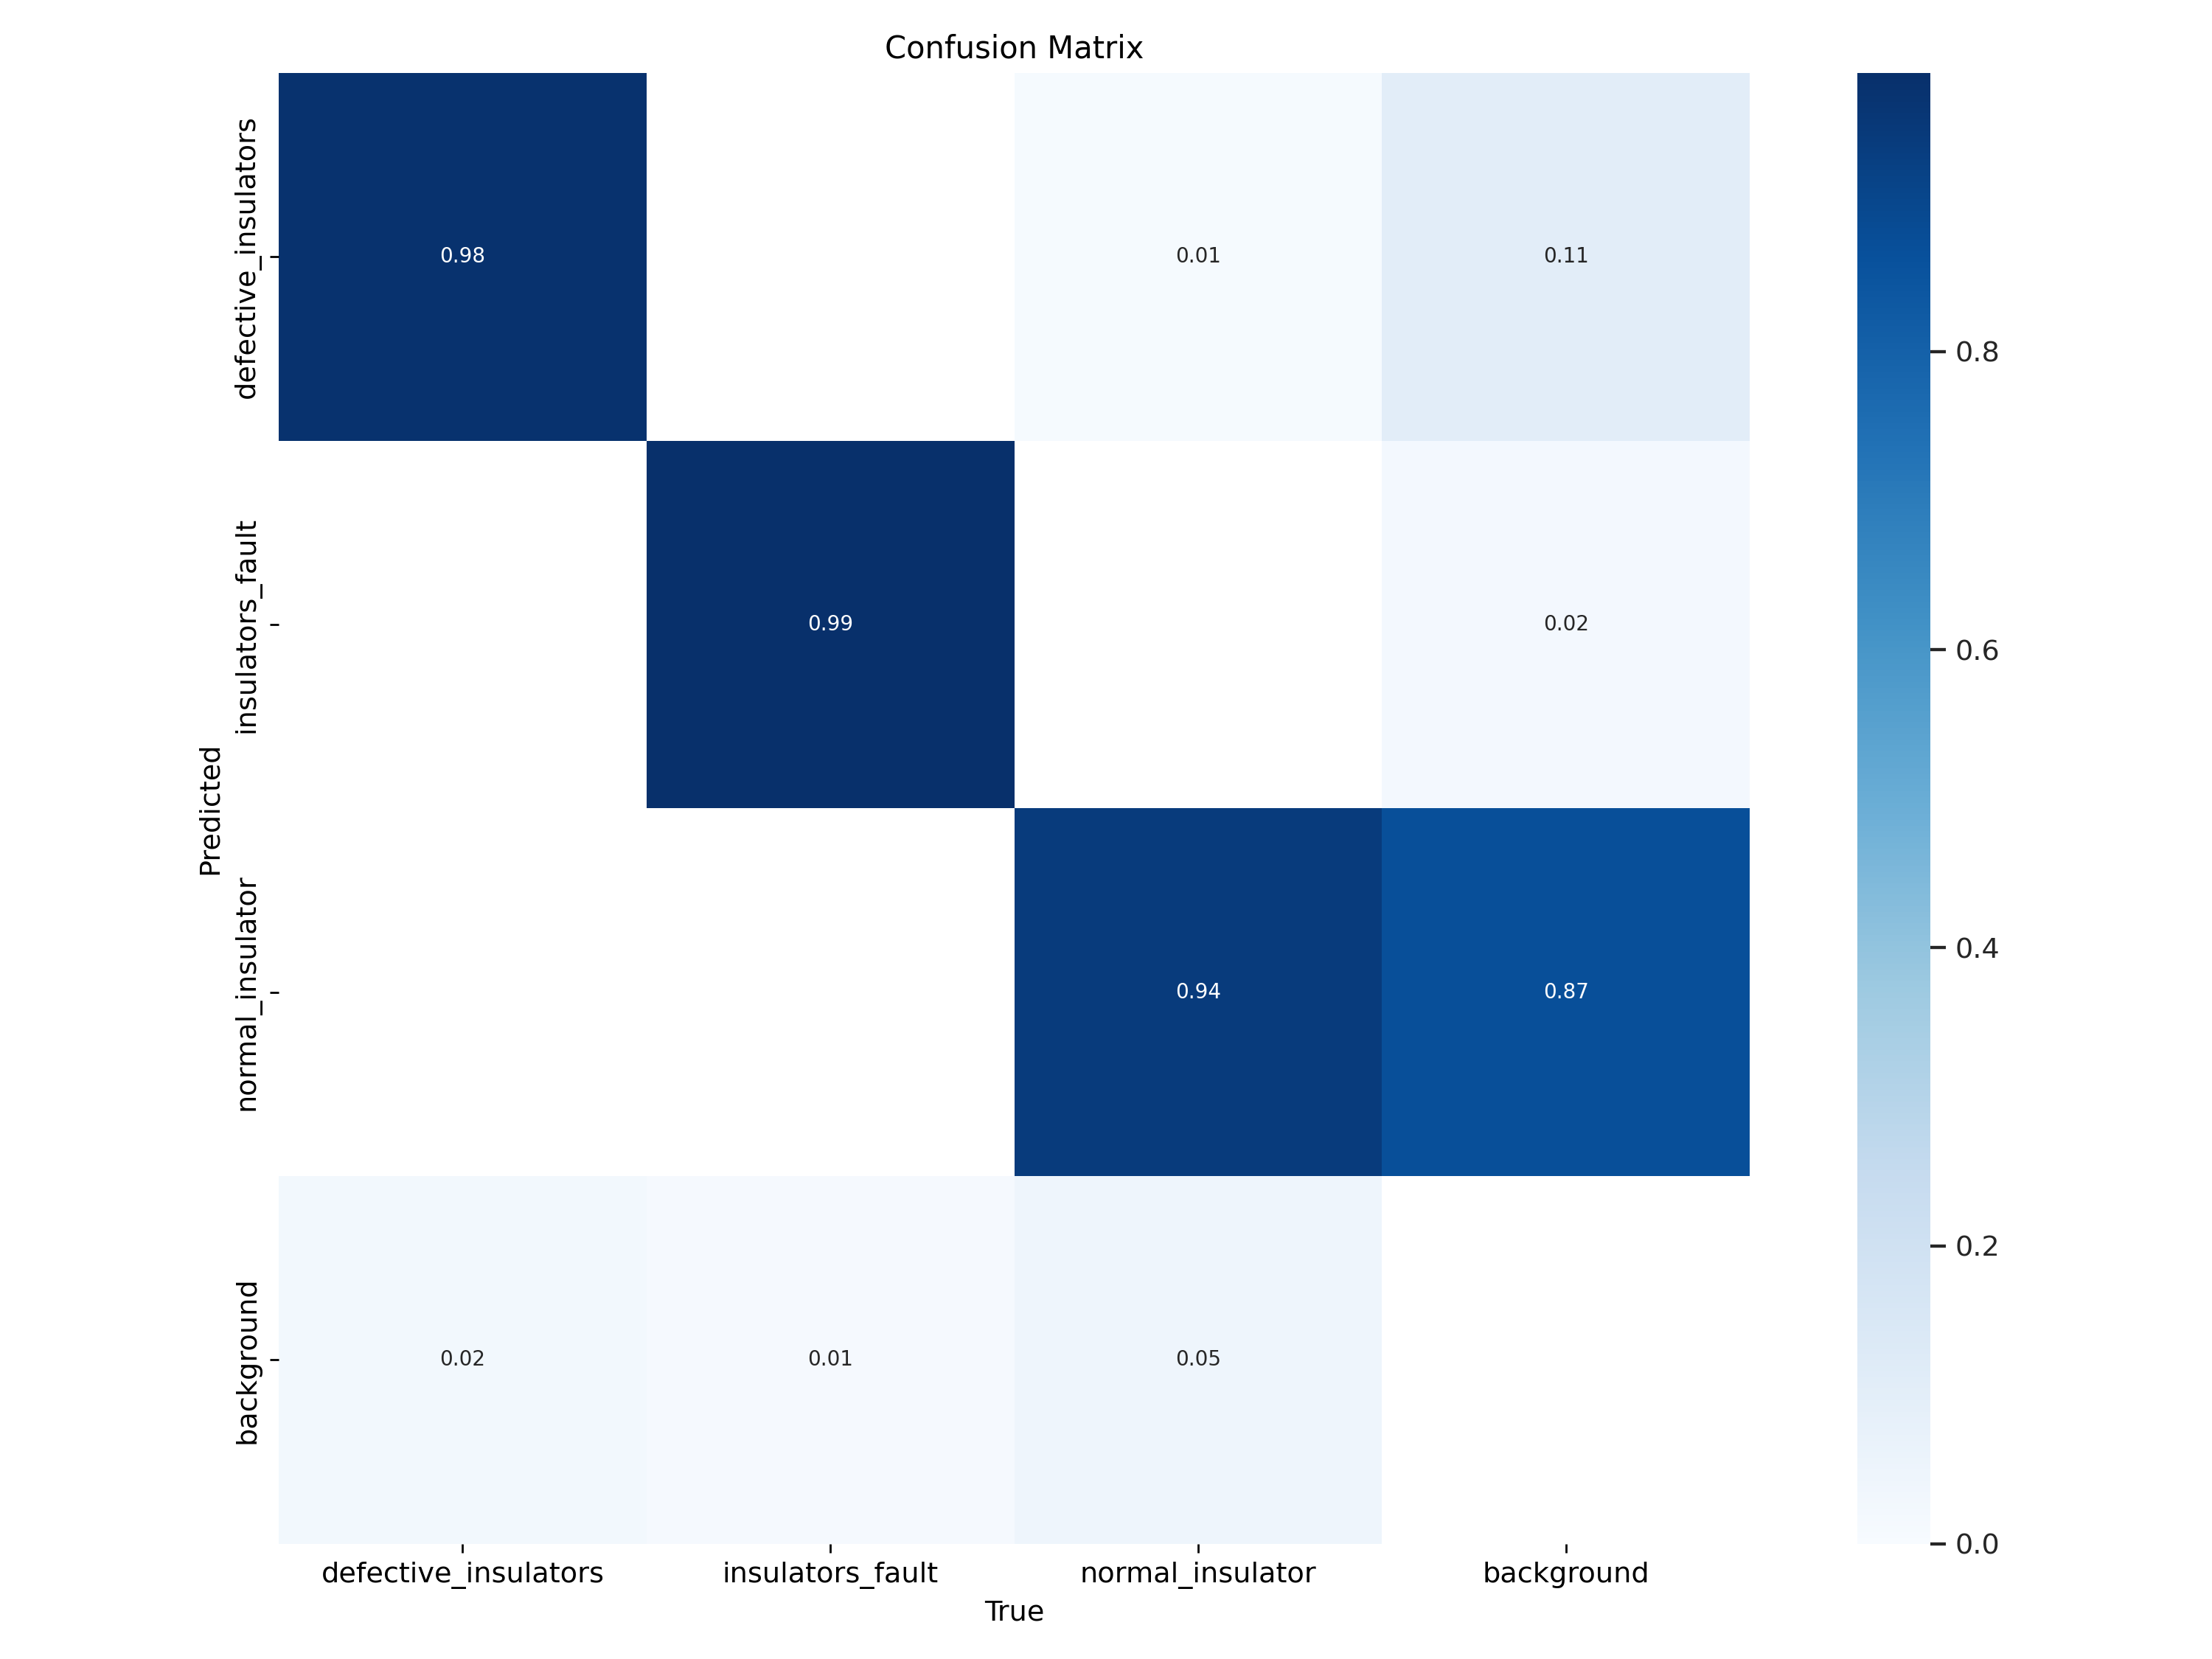

In [8]:
from IPython.display import Image
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

/content


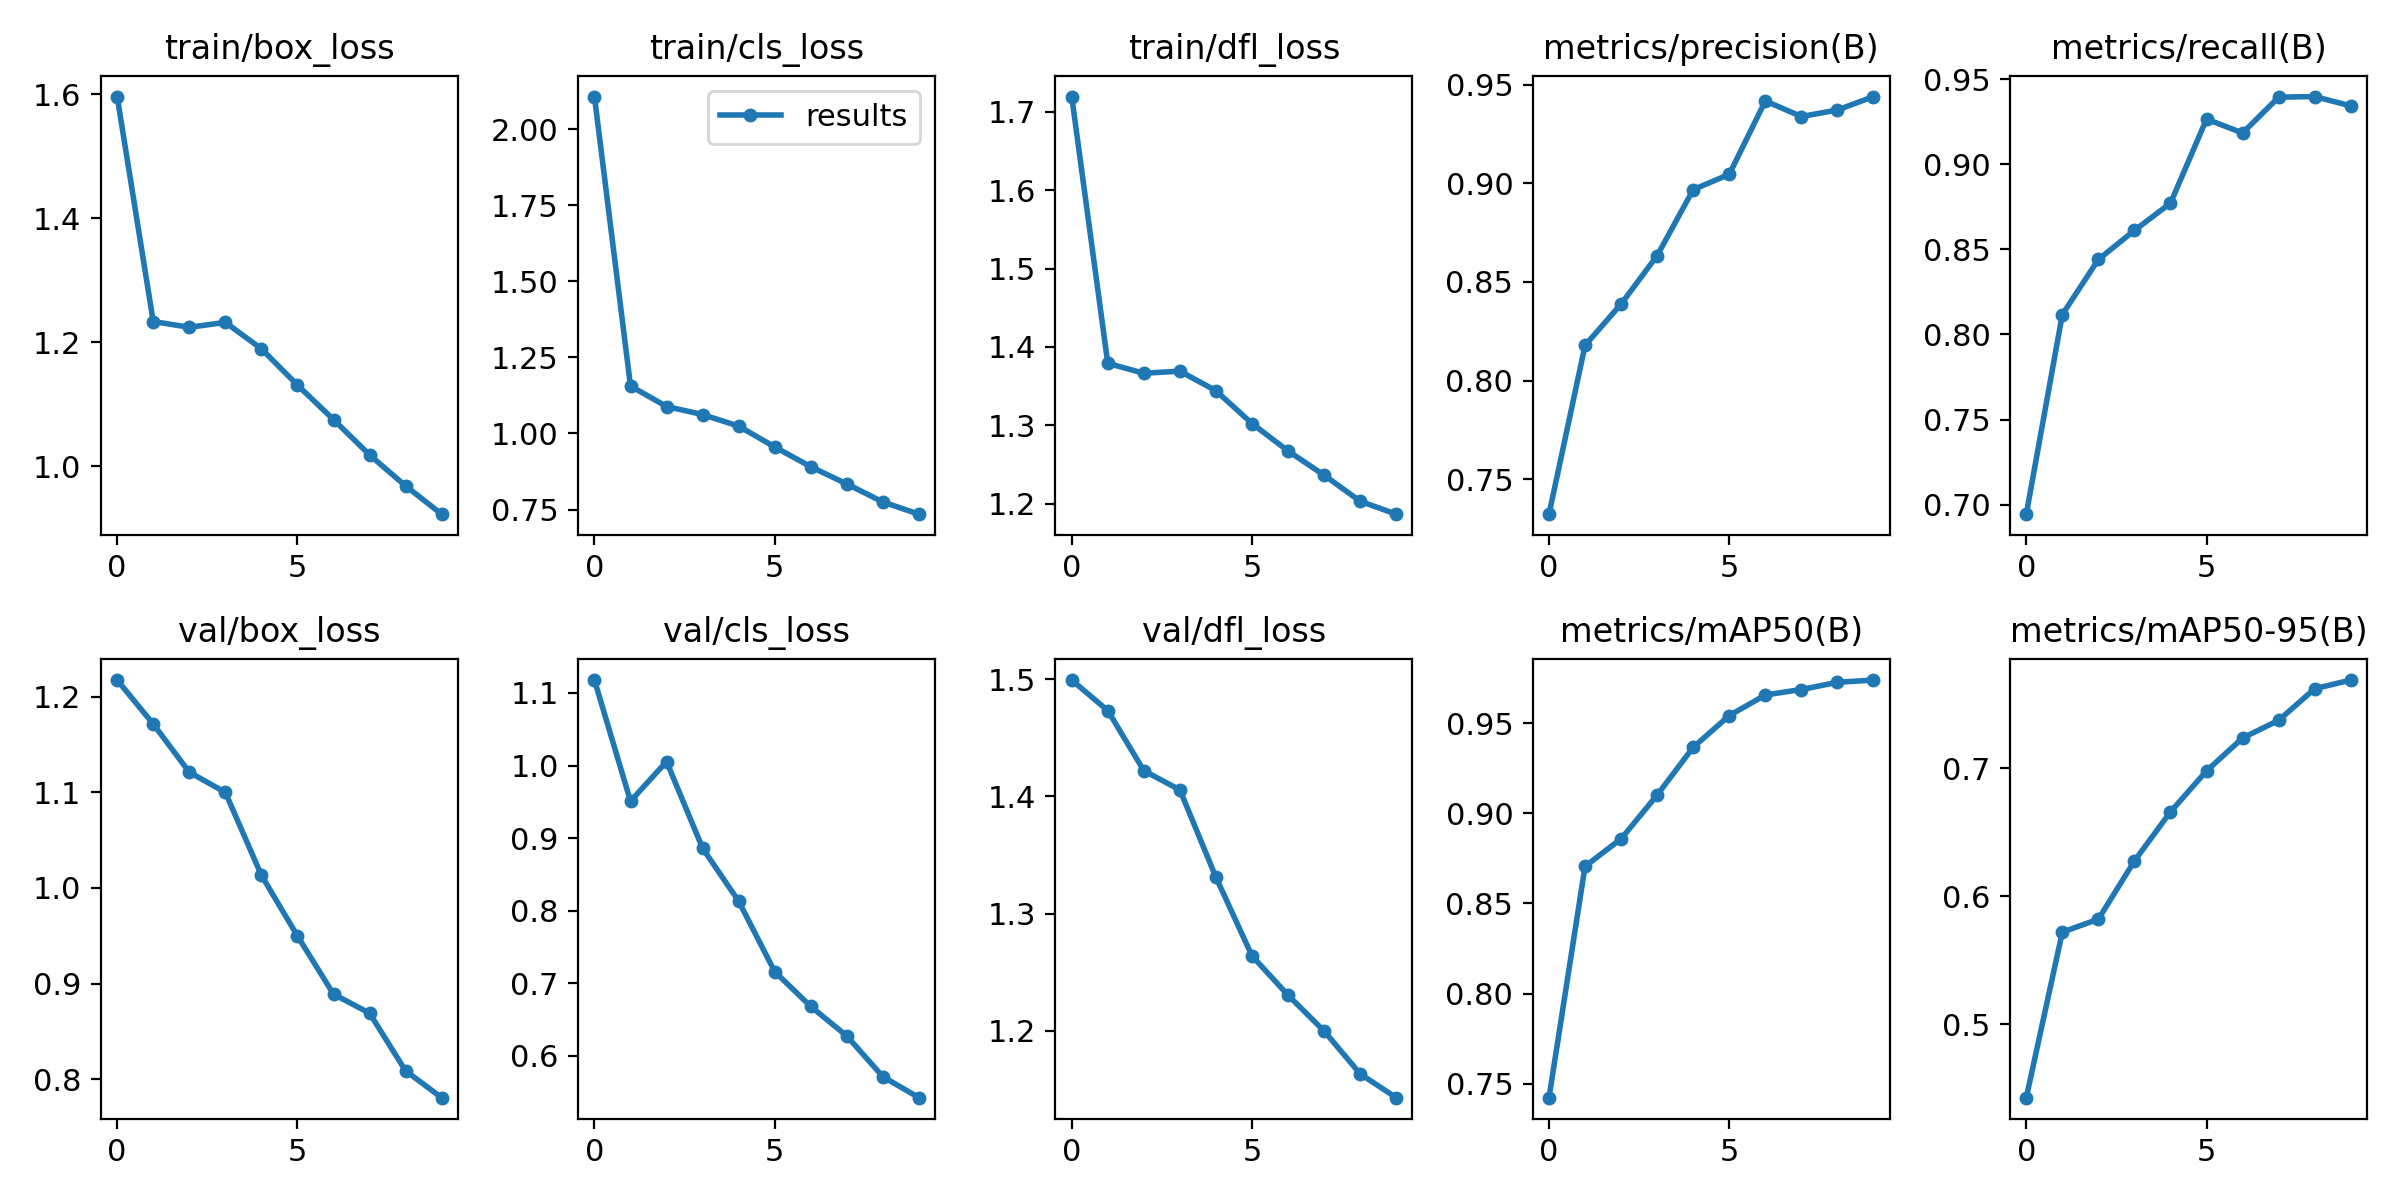

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

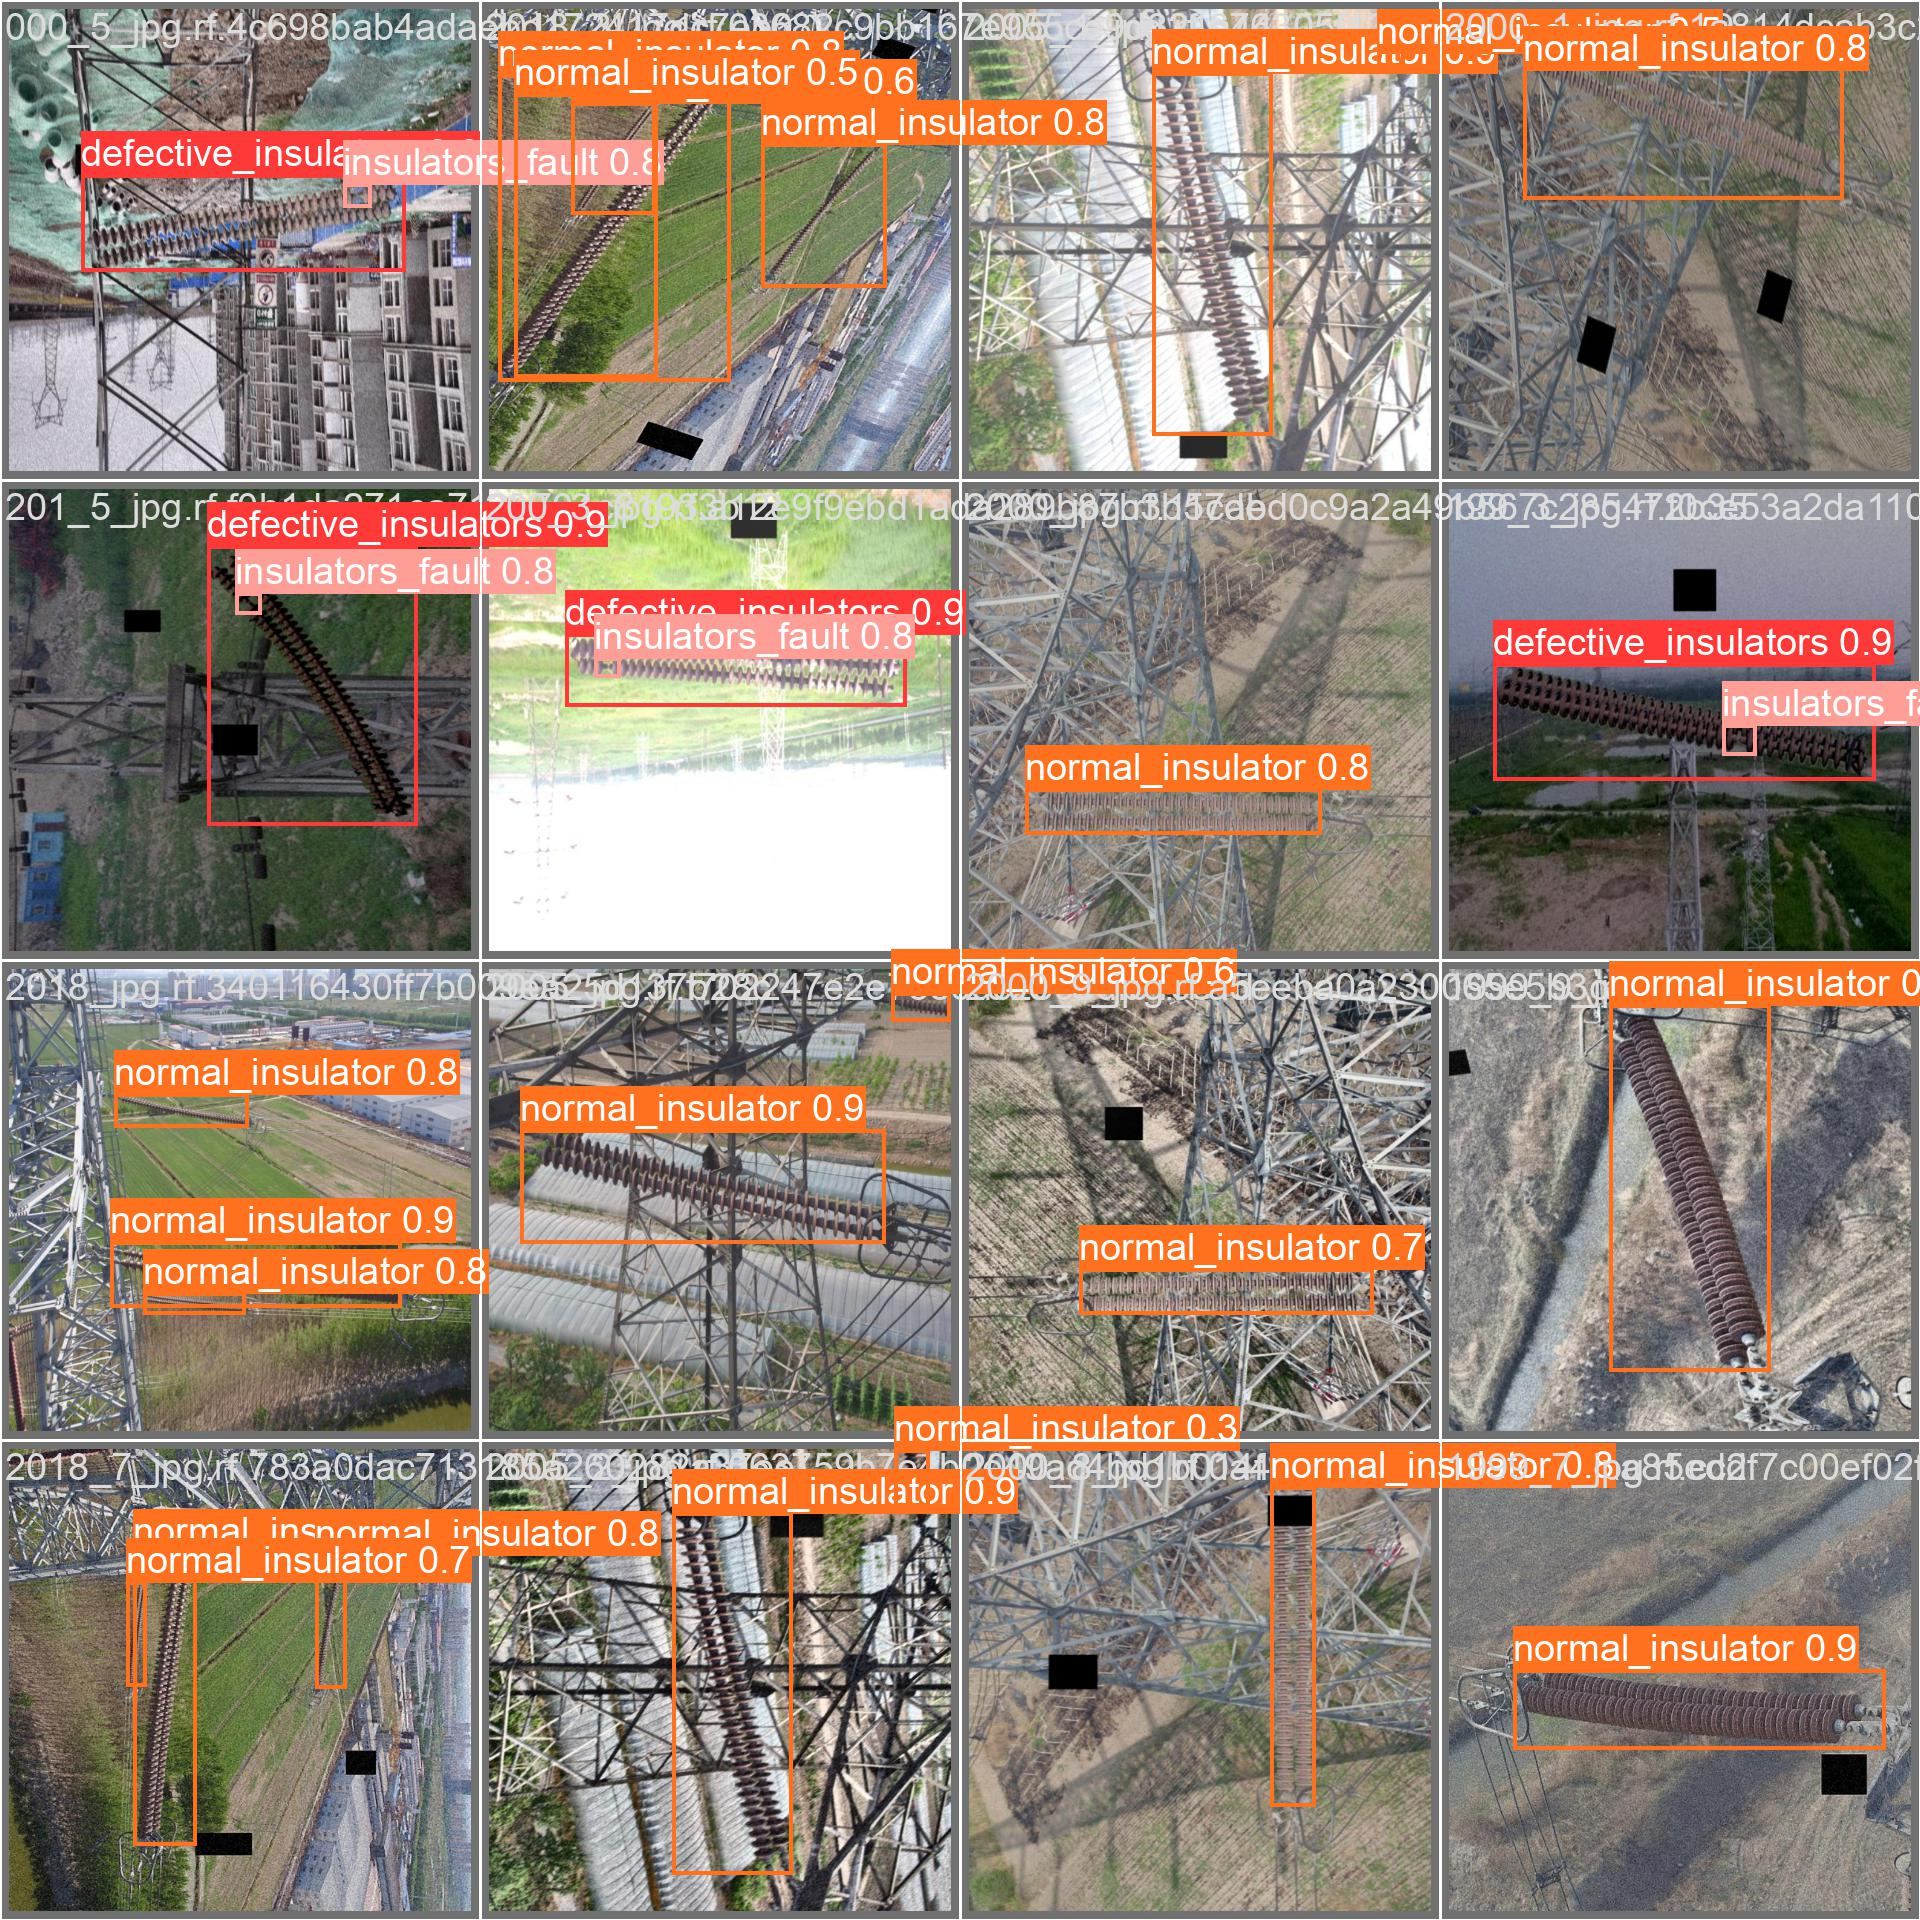

In [10]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.78 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Emerge-Test-1-1/valid/labels.cache... 1371 images, 0 backgrounds, 0 corrupt: 100% 1371/1371 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 86/86 [00:37<00:00,  2.28it/s]
                   all       1371       2472      0.944      0.935      0.974      0.769
  defective_insulators       1371        387      0.933      0.938      0.982      0.837
      insulators_fault       1371        387       0.99       0.98      0.991      0.713
      normal_insulator       1371       1698       0.91      0.885      0.949      0.756
Speed: 0.9ms preprocess, 14.9ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val


In [12]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.78 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/686 /content/datasets/Emerge-Test-1-1/test/images/000_2_jpg.rf.258825a06028e0a3b225805a3821d4da.jpg: 800x800 1 defective_insulators, 1 insulators_fault, 25.2ms
image 2/686 /content/datasets/Emerge-Test-1-1/test/images/002_2_jpg.rf.fa7c9cf86201296de2f535b78e7c7289.jpg: 800x800 1 defective_insulators, 1 insulators_fault, 24.7ms
image 3/686 /content/datasets/Emerge-Test-1-1/test/images/003_5_jpg.rf.8946bc99c15ca08642f5814b7315486e.jpg: 800x800 1 defective_insulators, 1 insulators_fault, 24.6ms
image 4/686 /content/datasets/Emerge-Test-1-1/test/images/003_jpg.rf.b1fc6d44a01104134384191c4b5bf636.jpg: 800x800 1 defective_insulators, 1 insulators_fault, 24.6ms
image 5/686 /content/datasets/Emerge-Test-1-1/test/images/0049_8_jpg.rf.1b3fcdede3a765c1b0b0eec38816920e.jpg: 800x800 2 normal_insulators, 24.6ms
image 6/686 /con

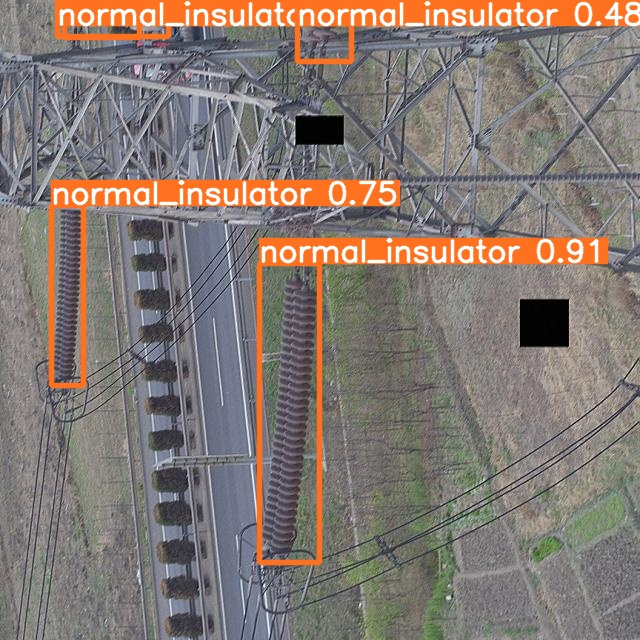

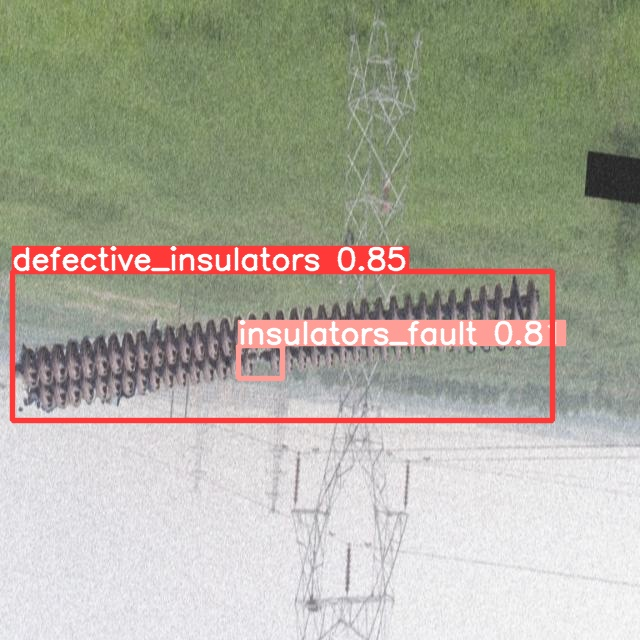

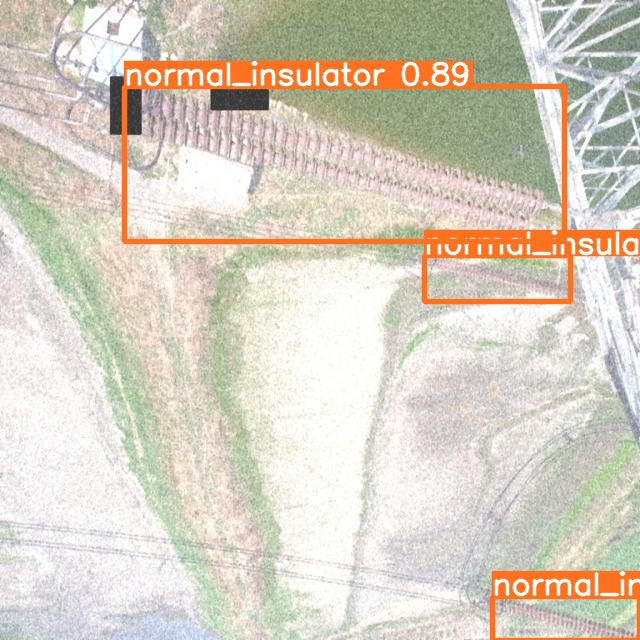

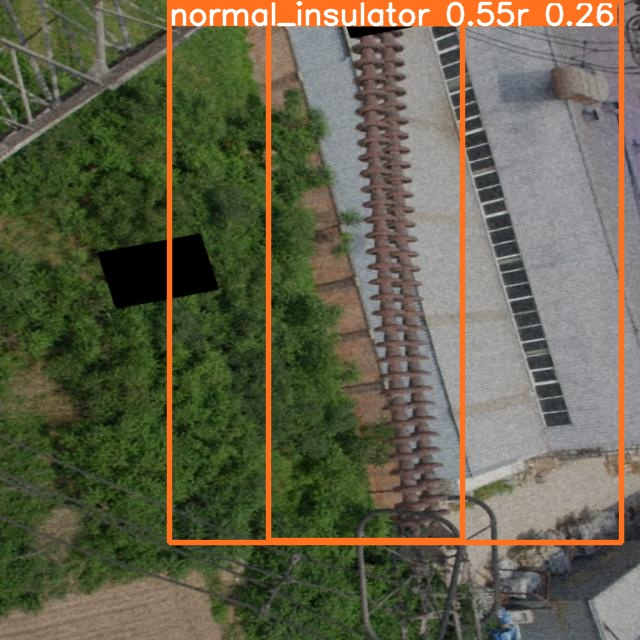

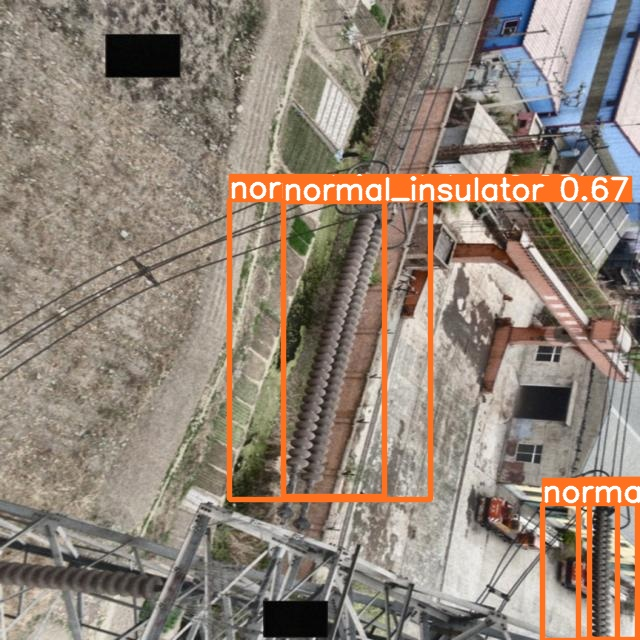

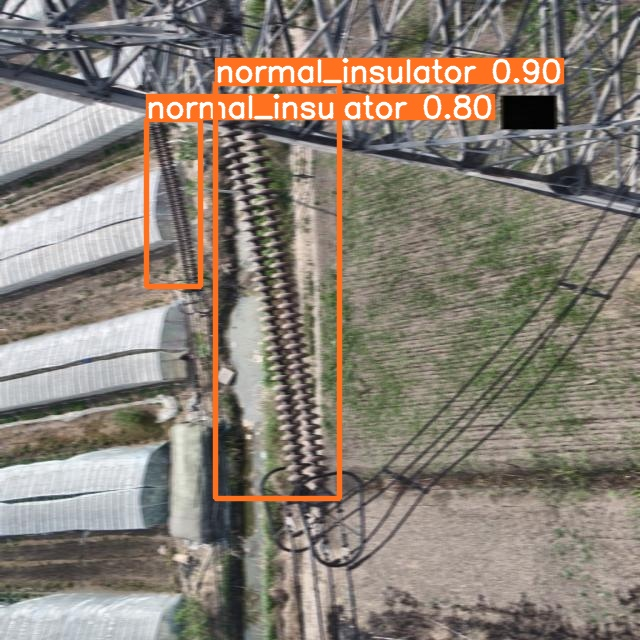

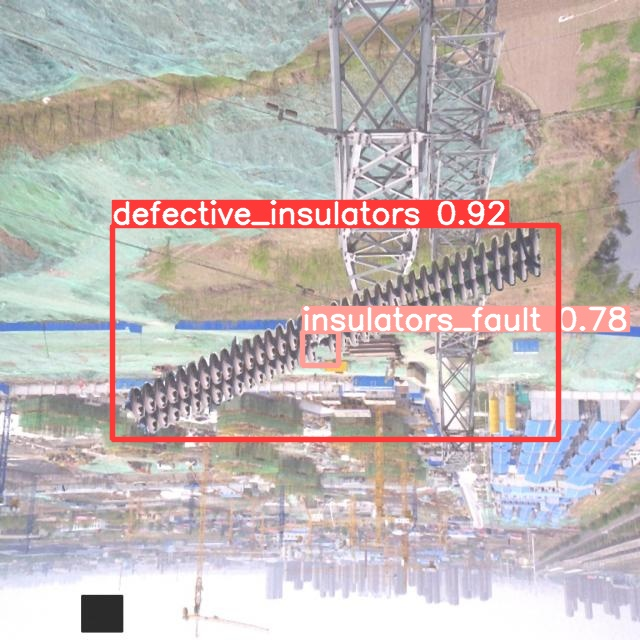

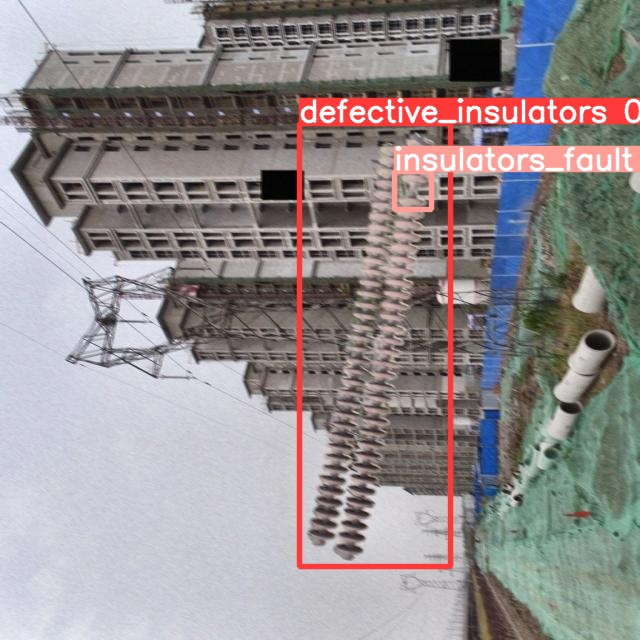

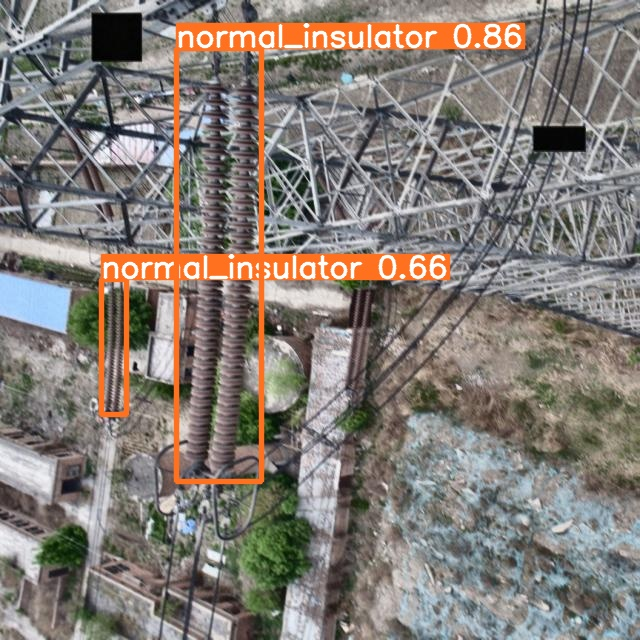

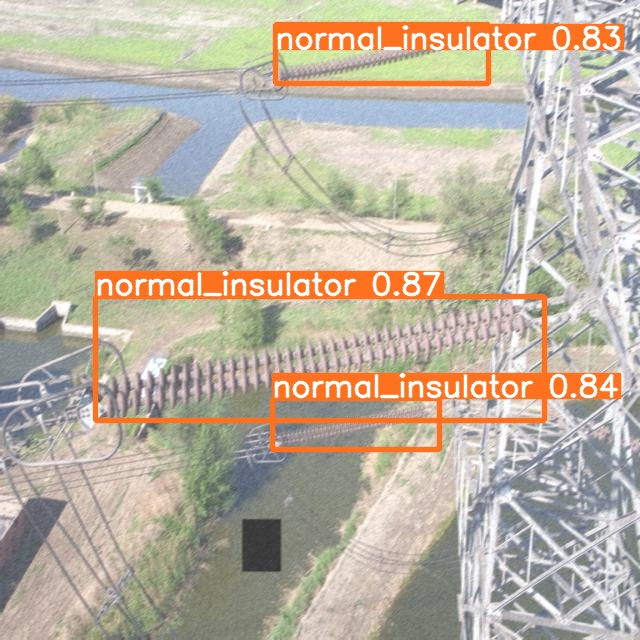

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")